## **Import Liberies**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## **Load Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print("Loaded file:", file_name)

df = pd.read_csv(file_name)

df.head()

Saving Data Science - state_level_estimated_data_science_learners_2015_2025_by_population.csv to Data Science - state_level_estimated_data_science_learners_2015_2025_by_population.csv
Loaded file: Data Science - state_level_estimated_data_science_learners_2015_2025_by_population.csv


,State,Year,Slow Growth Estimate,Realistic Estimate,Fast Growth Estimate,Population2024,pop_share
0,Andaman & Nicobar Islands,2015,99,88,59,404000,0.000289
1,Andaman & Nicobar Islands,2016,109,104,76,404000,0.000289
2,Andaman & Nicobar Islands,2017,120,122,99,404000,0.000289
3,Andaman & Nicobar Islands,2018,132,144,129,404000,0.000289
4,Andaman & Nicobar Islands,2019,145,170,168,404000,0.000289


In [6]:
print(df.info())
print("\nColumns:", df.columns.tolist())

print("\nTotal States:", df['State'].nunique())
print("Example States:", df['State'].unique()[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 396 non-null    object 
 1   Year                  396 non-null    int64  
 2   Slow Growth Estimate  396 non-null    int64  
 3   Realistic Estimate    396 non-null    int64  
 4   Fast Growth Estimate  396 non-null    int64  
 5   Population2024        396 non-null    int64  
 6   pop_share             396 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 21.8+ KB
None

Columns: ['State', 'Year', 'Slow Growth Estimate', 'Realistic Estimate', 'Fast Growth Estimate', 'Population2024', 'pop_share']

Total States: 36
Example States: ['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra & Nagar Haveli and Daman & Diu' 'Delhi' 'Goa']


## **India level trend**

In [7]:
india_trend = df.groupby("Year")["Realistic Estimate"].sum()

india_trend

,Realistic Estimate
Year,
2015,304365
2016,359151
2017,423794
2018,500082
2019,590095
2020,696314
2021,821649
2022,969547
2023,1144068


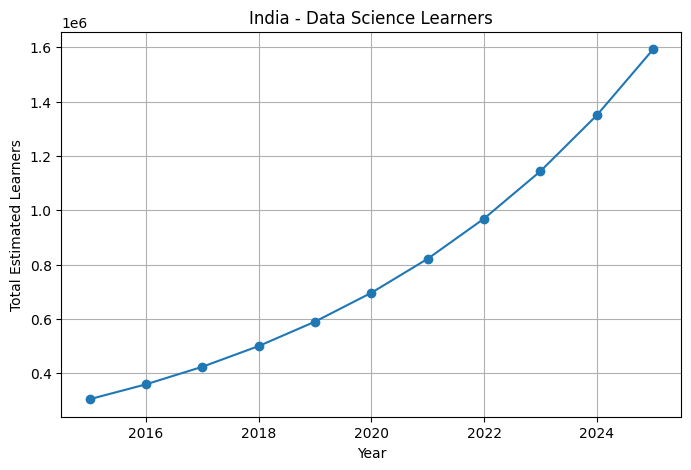

In [8]:
plt.figure(figsize=(8,5))
plt.plot(india_trend.index, india_trend.values, marker='o')
plt.title("India - Data Science Learners")
plt.xlabel("Year")
plt.ylabel("Total Estimated Learners")
plt.grid(True)
plt.show()

##**Latest year summary of Top states**

In [9]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]

summary = (df_latest[["State", "Realistic Estimate"]]
           .sort_values(by="Realistic Estimate", ascending=False))

summary.head(10)

,State,Realistic Estimate
373,Uttar Pradesh,270946
54,Bihar,146345
230,Maharashtra,144943
395,West Bengal,113308
219,Madhya Pradesh,99705
318,Rajasthan,93203
340,Tamil Nadu,87732
120,Gujarat,82358
175,Karnataka,77519
21,Andhra Pradesh,60704


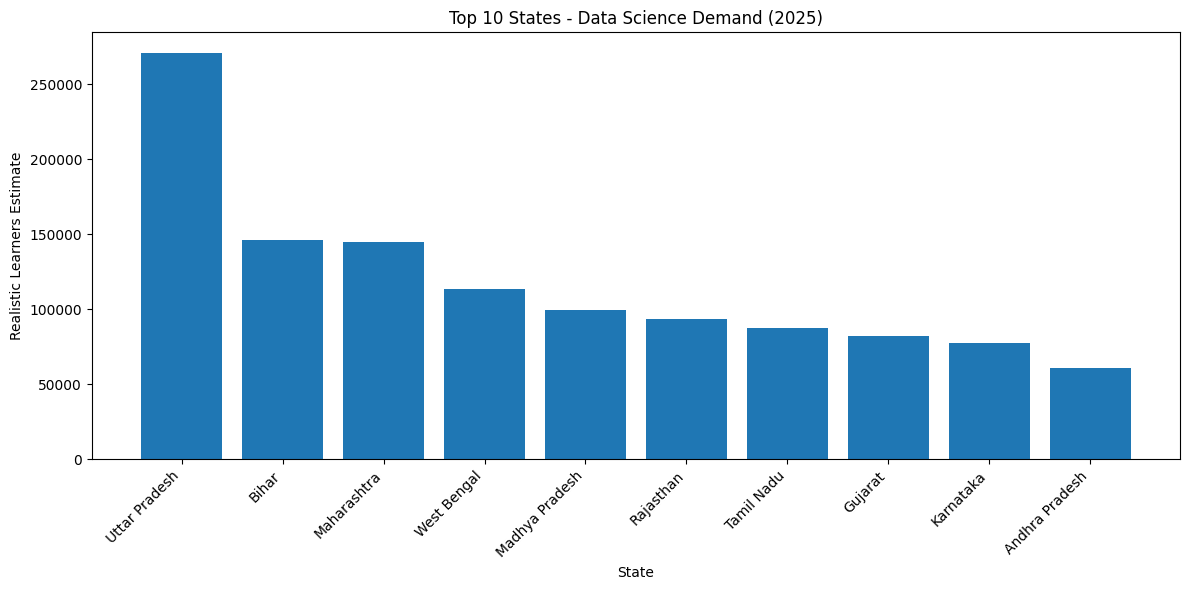

In [10]:
top10 = summary.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10["State"], top10["Realistic Estimate"])
plt.xticks(rotation=45, ha="right")
plt.title(f"Top 10 States - Data Science Demand ({latest_year})")
plt.xlabel("State")
plt.ylabel("Realistic Learners Estimate")
plt.tight_layout()
plt.show()

## **Jharkhand DS trend (2015–2025)**

In [11]:
jh = df[df["State"] == "Jharkhand"].sort_values("Year")

jh

,State,Year,Slow Growth Estimate,Realistic Estimate,Fast Growth Estimate,Population2024,pop_share
154,Jharkhand,2015,9807,8690,5815,39963000,0.02855
155,Jharkhand,2016,10788,10254,7560,39963000,0.02855
156,Jharkhand,2017,11867,12099,9828,39963000,0.02855
157,Jharkhand,2018,13054,14277,12776,39963000,0.02855
158,Jharkhand,2019,14359,16847,16609,39963000,0.02855
159,Jharkhand,2020,15795,19880,21592,39963000,0.02855
160,Jharkhand,2021,17375,23458,28069,39963000,0.02855
161,Jharkhand,2022,19112,27681,36490,39963000,0.02855
162,Jharkhand,2023,21023,32663,47437,39963000,0.02855
163,Jharkhand,2024,23126,38543,61668,39963000,0.02855


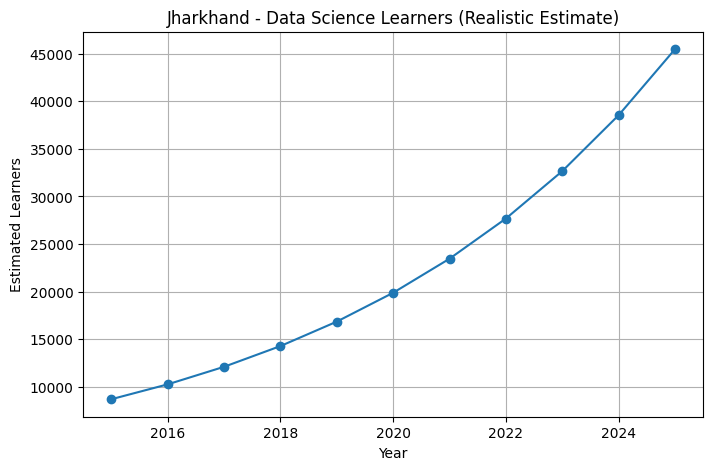

In [12]:
plt.figure(figsize=(8,5))
plt.plot(jh["Year"], jh["Realistic Estimate"], marker='o')
plt.title("Jharkhand - Data Science Learners (Realistic Estimate)")
plt.xlabel("Year")
plt.ylabel("Estimated Learners")
plt.grid(True)
plt.show()

## **Forecast model (2015–2030)**

In [13]:
X = jh["Year"].values.reshape(-1, 1)
y = jh["Realistic Estimate"].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(jh["Year"].min(), 2031).reshape(-1, 1)

forecast = model.predict(future_years)

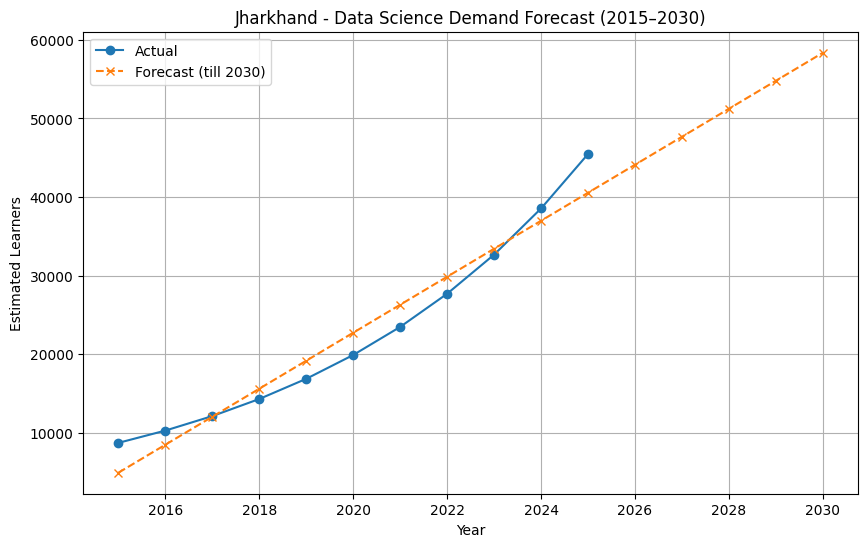

In [14]:
plt.figure(figsize=(10,6))

plt.plot(jh["Year"], jh["Realistic Estimate"], marker='o', label="Actual")

plt.plot(future_years.flatten(), forecast, linestyle='--', marker='x', label="Forecast (till 2030)")

plt.title("Jharkhand - Data Science Demand Forecast (2015–2030)")
plt.xlabel("Year")
plt.ylabel("Estimated Learners")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
forecast_table = pd.DataFrame({
    "Year": future_years.flatten(),
    "Forecast_Demand": forecast.astype(int)
})

forecast_table

,Year,Forecast_Demand
0,2015,4887
1,2016,8453
2,2017,12018
3,2018,15584
4,2019,19150
5,2020,22715
6,2021,26281
7,2022,29846
8,2023,33412
9,2024,36978


## **Jharkhand Annual Growth Rate**

In [16]:
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

jh_start = jh["Realistic Estimate"].iloc[0]
jh_end = jh["Realistic Estimate"].iloc[-1]
years = len(jh)

jh_cagr = calculate_cagr(jh_start, jh_end, years)

print(f"Jharkhand CAGR (Avg Annual Growth %): {jh_cagr:.2f}%")

Jharkhand CAGR (Avg Annual Growth %): 16.24%


## **India Annual Growth Rate**

In [22]:
india_df = df.groupby("Year")["Realistic Estimate"].sum().reset_index()

india_start = india_df["Realistic Estimate"].iloc[0]
india_end = india_df["Realistic Estimate"].iloc[-1]
india_years = len(india_df) - 1

india_cagr = calculate_cagr(india_start, india_end, india_years)

print(f"India CAGR: {india_cagr:.2f}%")

India CAGR: 18.00%
